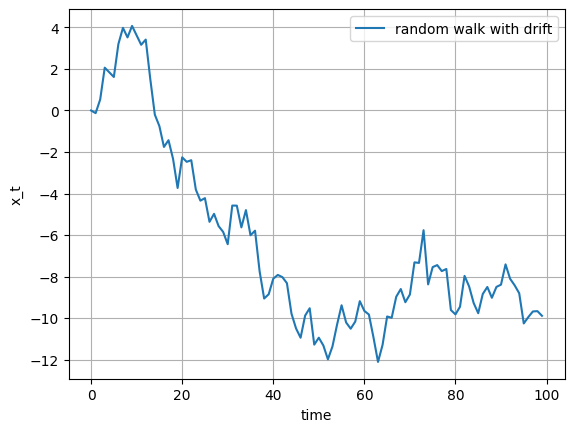

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

delta = 0.01
n = 100
np.random.seed(42)

w_t = np.random.normal(0, 1, n)
x_t = np.zeros(n)
x_t[0] = 0

for t in range(1, n):
    x_t[t] = delta + x_t[t-1] + w_t[t]

plt.plot(x_t, label = 'random walk with drift')
plt.xlabel('time')
plt.ylabel('x_t')
plt.legend()
plt.grid(True)
plt.show()

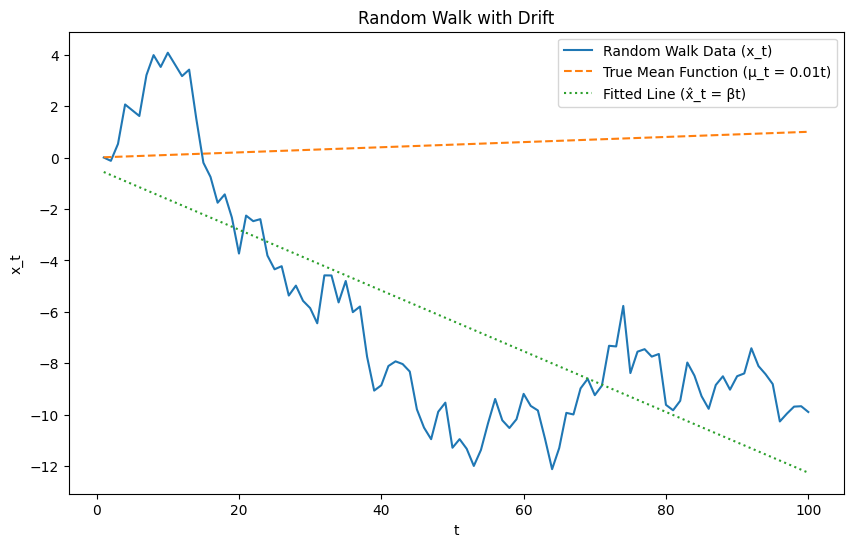

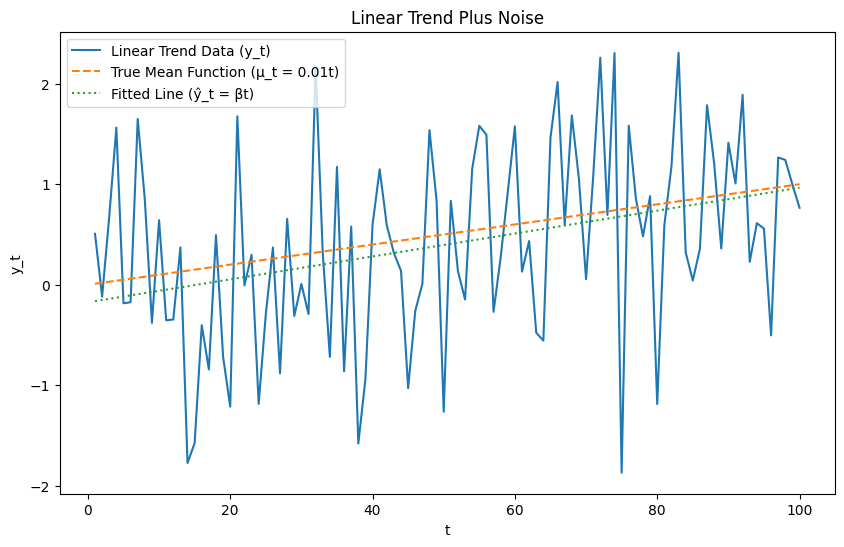

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Part (a) Random walk with drift
np.random.seed(42)  # For reproducibility
n = 100
delta = 0.01
sigma_w = 1
w_t = np.random.normal(0, sigma_w, n)
x_t = np.zeros(n)
x_t[0] = 0

# Generate the series
for t in range(1, n):
    x_t[t] = delta + x_t[t-1] + w_t[t]

# Fit regression x_t = βt + ε_t
t_values = np.arange(1, n + 1)
X = sm.add_constant(t_values)
model = sm.OLS(x_t, X).fit()
fitted_values = model.fittedvalues

# True mean function μ_t = 0.01t
true_mean_function = 0.01 * t_values

# Plot the data, true mean, and fitted line
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_t, label='Random Walk Data (x_t)')
plt.plot(t_values, true_mean_function, label='True Mean Function (μ_t = 0.01t)', linestyle='--')
plt.plot(t_values, fitted_values, label='Fitted Line (x̂_t = βt)', linestyle=':')
plt.xlabel('t')
plt.ylabel('x_t')
plt.title('Random Walk with Drift')
plt.legend()
plt.show()

# Part (b) Linear trend plus noise
y_t = 0.01 * t_values + w_t

# Fit regression y_t = βt + ε_t
model_y = sm.OLS(y_t, X).fit()
fitted_values_y = model_y.fittedvalues

# Plot the data, true mean, and fitted line
plt.figure(figsize=(10, 6))
plt.plot(t_values, y_t, label='Linear Trend Data (y_t)')
plt.plot(t_values, true_mean_function, label='True Mean Function (μ_t = 0.01t)', linestyle='--')
plt.plot(t_values, fitted_values_y, label='Fitted Line (ŷ_t = βt)', linestyle=':')
plt.xlabel('t')
plt.ylabel('y_t')
plt.title('Linear Trend Plus Noise')
plt.legend()
plt.show()
